# 2021 Philadelphia Race Profile

### Description:
The selected American Community Survey (ACS) 2021 (5-Year Estimates) dataset was sourced from Social Explorer; U.S. Census Bureau. The ACS survey data is used to explored Philadelphia's race profile, as well as the North Philadelphia's Logan Neighborhood Race Profile. Then, Philadelphia's 2010 census tracts are imported via a geojson file soured from Open Data Philly. The race data is then overlayed on the spatial file to view at the city and neighborhood level. 

#### Author: 

Lindsey Morris

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

Load a data file from Week 3 of my repo

In [3]:
race = pd.read_csv('2021race.csv')

Inspect size of the data

In [4]:
race.shape

(408, 70)

The output above shows that there are 408 row and 70 columns in the dataset

In [5]:
race.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  42101000101  Census Tract 1.01, Philadelphia County, Pennsy...      ACSSF   
1  42101000102  Census Tract 1.02, Philadelphia County, Pennsy...      ACSSF   
2  42101000200  Census Tract 2, Philadelphia County, Pennsylvania      ACSSF   
3  42101000300  Census Tract 3, Philadelphia County, Pennsylvania      ACSSF   
4  42101000401  Census Tract 4.01, Philadelphia County, Pennsy...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         pa         140            0          8807     NaN         NaN   
1         pa         140            0          8808     NaN         NaN   
2         pa         140            0          8809     NaN         NaN   
3         pa         140            0          8810     NaN         NaN   
4         pa         140            0          8811     NaN         NaN   

   Geo_DIVISION  ...  SE_A03001_006  SE_A03001_007  SE_A03001_008  \
0           NaN  ...              0             99             37   
1           NaN  ...              0             48             35   
2           NaN  ...              0              3            235   
3           NaN  ...              0             56            405   
4           NaN  ...              0              0            128   

   PCT_SE_A03001_002  PCT_SE_A03001_003  PCT_SE_A03001_004  PCT_SE_A03001_005  \
0              83.98               1.40               0.00               7.83   
1              91.24               2.98               0.00               2.76   
2              31.14               6.59               0.00              55.30   
3              63.63               6.11               0.08              17.25   
4              61.99              14.57               0.00              18.46   

   PCT_SE_A03001_006  PCT_SE_A03001_007  PCT_SE_A03001_008  
0                0.0               4.94               1.85  
1                0.0               1.74               1.27  
2                0.0               0.09               6.88  
3                0.0               1.57              11.36  
4                0.0               0.00               4.97  

[5 rows x 70 columns]

The output above shows the first 5 rows of the dataset

Look at the data type

In [6]:
race.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           408 non-null    int64  
 1   Geo_QName          408 non-null    object 
 2   Geo_FILEID         408 non-null    object 
 3   Geo_STUSAB         408 non-null    object 
 4   Geo_SUMLEV         408 non-null    int64  
 5   Geo_GEOCOMP        408 non-null    int64  
 6   Geo_LOGRECNO       408 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          408 non-null    int64  
 12  Geo_COUNTY         408 non-null    int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          408 non-null    int64  
 16  Geo_BLKGRP         0 non-n

#### Assigning Data Types on Import

Take a closer look at the unique identifier column, Geo_FIPS.

In [7]:
race.Geo_FIPS.head()

0    42101000101
1    42101000102
2    42101000200
3    42101000300
4    42101000401
Name: Geo_FIPS, dtype: int64

In [8]:
race.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  42101000101  Census Tract 1.01, Philadelphia County, Pennsy...      ACSSF   
1  42101000102  Census Tract 1.02, Philadelphia County, Pennsy...      ACSSF   
2  42101000200  Census Tract 2, Philadelphia County, Pennsylvania      ACSSF   
3  42101000300  Census Tract 3, Philadelphia County, Pennsylvania      ACSSF   
4  42101000401  Census Tract 4.01, Philadelphia County, Pennsy...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         pa         140            0          8807     NaN         NaN   
1         pa         140            0          8808     NaN         NaN   
2         pa         140            0          8809     NaN         NaN   
3         pa         140            0          8810     NaN         NaN   
4         pa         140            0          8811     NaN         NaN   

   Geo_DIVISION  ...  SE_A03001_006  SE_A03001_007  SE_A03001_008  \
0           NaN  ...              0             99             37   
1           NaN  ...              0             48             35   
2           NaN  ...              0              3            235   
3           NaN  ...              0             56            405   
4           NaN  ...              0              0            128   

   PCT_SE_A03001_002  PCT_SE_A03001_003  PCT_SE_A03001_004  PCT_SE_A03001_005  \
0              83.98               1.40               0.00               7.83   
1              91.24               2.98               0.00               2.76   
2              31.14               6.59               0.00              55.30   
3              63.63               6.11               0.08              17.25   
4              61.99              14.57               0.00              18.46   

   PCT_SE_A03001_006  PCT_SE_A03001_007  PCT_SE_A03001_008  
0                0.0               4.94               1.85  
1                0.0               1.74               1.27  
2                0.0               0.09               6.88  
3                0.0               1.57              11.36  
4                0.0               0.00               4.97  

[5 rows x 70 columns]

Confirm race dataset has the correct datatypes. 

In [9]:
race.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           408 non-null    int64  
 1   Geo_QName          408 non-null    object 
 2   Geo_FILEID         408 non-null    object 
 3   Geo_STUSAB         408 non-null    object 
 4   Geo_SUMLEV         408 non-null    int64  
 5   Geo_GEOCOMP        408 non-null    int64  
 6   Geo_LOGRECNO       408 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          408 non-null    int64  
 12  Geo_COUNTY         408 non-null    int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          408 non-null    int64  
 16  Geo_BLKGRP         0 non-n

#### Drop/Delete Null Columns

In [10]:
race.columns[race.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

Output above shows many null columns

Eliminate the null columns 

In [11]:
race = race.dropna(axis=1,how="all")

check that the null columns have been dropped

In [12]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           408 non-null    int64  
 1   Geo_QName          408 non-null    object 
 2   Geo_FILEID         408 non-null    object 
 3   Geo_STUSAB         408 non-null    object 
 4   Geo_SUMLEV         408 non-null    int64  
 5   Geo_GEOCOMP        408 non-null    int64  
 6   Geo_LOGRECNO       408 non-null    int64  
 7   Geo_STATE          408 non-null    int64  
 8   Geo_COUNTY         408 non-null    int64  
 9   Geo_TRACT          408 non-null    int64  
 10  Geo_GEOID          408 non-null    object 
 11  Geo_NAME           408 non-null    object 
 12  SE_A03001_001      408 non-null    int64  
 13  SE_A03001_002      408 non-null    int64  
 14  SE_A03001_003      408 non-null    int64  
 15  SE_A03001_004      408 non-null    int64  
 16  SE_A03001_005      408 non

Null columns were dropped

Reinspect the data below

In [13]:
race.head()

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  42101000101  Census Tract 1.01, Philadelphia County, Pennsy...      ACSSF   
1  42101000102  Census Tract 1.02, Philadelphia County, Pennsy...      ACSSF   
2  42101000200  Census Tract 2, Philadelphia County, Pennsylvania      ACSSF   
3  42101000300  Census Tract 3, Philadelphia County, Pennsylvania      ACSSF   
4  42101000401  Census Tract 4.01, Philadelphia County, Pennsy...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_STATE  Geo_COUNTY  \
0         pa         140            0          8807         42         101   
1         pa         140            0          8808         42         101   
2         pa         140            0          8809         42         101   
3         pa         140            0          8810         42         101   
4         pa         140            0          8811         42         101   

   Geo_TRACT  ... SE_A03001_006 SE_A03001_007  SE_A03001_008  \
0        101  ...             0            99             37   
1        102  ...             0            48             35   
2        200  ...             0             3            235   
3        300  ...             0            56            405   
4        401  ...             0             0            128   

   PCT_SE_A03001_002  PCT_SE_A03001_003  PCT_SE_A03001_004  PCT_SE_A03001_005  \
0              83.98               1.40               0.00               7.83   
1              91.24               2.98               0.00               2.76   
2              31.14               6.59               0.00              55.30   
3              63.63               6.11               0.08              17.25   
4              61.99              14.57               0.00              18.46   

   PCT_SE_A03001_006  PCT_SE_A03001_007  PCT_SE_A03001_008  
0                0.0               4.94               1.85  
1                0.0               1.74               1.27  
2                0.0               0.09               6.88  
3                0.0               1.57              11.36  
4                0.0               0.00               4.97  

[5 rows x 27 columns]

#### Working with the Census Data Dictionary

##### Define Columns to Keep

In this session, the ACS 2021 "Race by Ethnicity" columns (listed below) are being analyzed. 

- Geo_TRACT: Census Tract
- Geo_FIPS: Geographic FIPS identifier
- SE_A03001_001: Total Population
- SE_A03001_002: Non Hispanic White Alone
- SE_A03001_003: Non Hispanic Black or African American Alone 
- SE_A03001_004: Non Hispanic American Indian and Alaska Native Alone
- SE_A03001_005: Non Hispanic Asian Alone
- SE_A03001_006: Non Hispanic Native Hawaiian and Pacific Islander Alone
- SE_A03001_007: Non Hispanic Other Alone
- SE_A03001_008: Non Hispanic Multi Race
- PCT_SE_A03001_002: % White Alone
- PCT_SE_A03001_003: % Black or African American Alone
- PCT_SE_A03001_004: % American Indian and Alaska Native Alone
- PCT_SE_A03001_005: % Asian Alone
- PCT_SE_A03001_006: % Native Hawaiian and Other Pacific Islander Alone
- PCT_SE_A03001_007: % Some Other Race Alone
- PCT_SE_A03001_008: % Two or More Races


Create a subset of our dataframe and create a new dataframe

In [14]:
columns_to_keep = ['Geo_TRACT',
                   'Geo_FIPS',
                   'SE_A03001_001',
                   'SE_A03001_002',
                   'SE_A03001_003',
                   'SE_A03001_004',
                   'SE_A03001_005',
                   'SE_A03001_006',
                   'SE_A03001_007',
                   'SE_A03001_008',
                   'PCT_SE_A03001_002',
                   'PCT_SE_A03001_003',
                   'PCT_SE_A03001_004',
                   'PCT_SE_A03001_005',
                   'PCT_SE_A03001_006', 
                   'PCT_SE_A03001_007',
                   'PCT_SE_A03001_008']

race2 = race[columns_to_keep]

Rename the kept columns. Begin by creating a list of columns as they are now

In [15]:
columns = list(race2) # this is the same as race.columns.to_list()
columns

['Geo_TRACT',
 'Geo_FIPS',
 'SE_A03001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008',
 'PCT_SE_A03001_002',
 'PCT_SE_A03001_003',
 'PCT_SE_A03001_004',
 'PCT_SE_A03001_005',
 'PCT_SE_A03001_006',
 'PCT_SE_A03001_007',
 'PCT_SE_A03001_008']

Replace the values with desired column names

In [56]:
race2.columns = ['Census Tract',
                 'FIPS',
                 'Total Population',
                 'White',
                 'Black',
                 'American Indian and Alaska Native',
                 'Asian',
                 'Native Hawaiian and Other Pacific Islander',
                 'Other Race',
                'Multi Race',
                'Percent White',
                'Percent Black',
                'Percent American Indian and Alaska Native',
                'Percent Asian',
                'Percent Native Hawaiian and Other Pacific Islander',
                'Percent Other Race',
                'Percent Multi Race']

In [57]:
race2.sample(5)

Census Tract         FIPS  Total Population  White  Black  \
65           6100  42101006100              2784    168   2437   
214         21200  42101021200              2666   2099    368   
382         38800  42101038800              3783   2336    938   
319         33200  42101033200              3088   1640    148   
343         35301  42101035301              5419   4517    108   

     American Indian and Alaska Native  Asian  \
65                                   0    161   
214                                  0     59   
382                                  0     65   
319                                  0   1006   
343                                 19    106   

     Native Hawaiian and Other Pacific Islander  Other Race  Multi Race  \
65                                            0           0          18   
214                                           0         103          37   
382                                           0           0         444   
319                                           0         292           2   
343                                           0         101         568   

     Percent White  Percent Black  Percent American Indian and Alaska Native  \
65            6.03          87.54                                       0.00   
214          78.73          13.80                                       0.00   
382          61.75          24.80                                       0.00   
319          53.11           4.79                                       0.00   
343          83.35           1.99                                       0.35   

     Percent Asian  Percent Native Hawaiian and Other Pacific Islander  \
65            5.78                                                0.0    
214           2.21                                                0.0    
382           1.72                                                0.0    
319          32.58                                                0.0    
343           1.96                                                0.0    

     Percent Other Race  Percent Multi Race  
65                 0.00                0.65  
214                3.86                1.39  
382                0.00               11.74  
319                9.46                0.06  
343                1.86               10.48

Columns have been renamed correctly.

#### Philadelphia race stats and plots 

View the Total Population Mean of Philadelphia County

In [58]:
race2['Total Population'].mean()

3913.8848039215686

View the Total Population Media of Philadelphia County

In [59]:
race2['Total Population'].median()

3870.5

View more stats available for total population of Philadeliphia County

In [60]:
race2['Total Population'].describe()

count      408.000000
mean      3913.884804
std       1863.577796
min          0.000000
25%       2750.500000
50%       3870.500000
75%       5002.000000
max      10074.000000
Name: Total Population, dtype: float64

Plot it as a historgram with 50 bins


<AxesSubplot: ylabel='Frequency'>

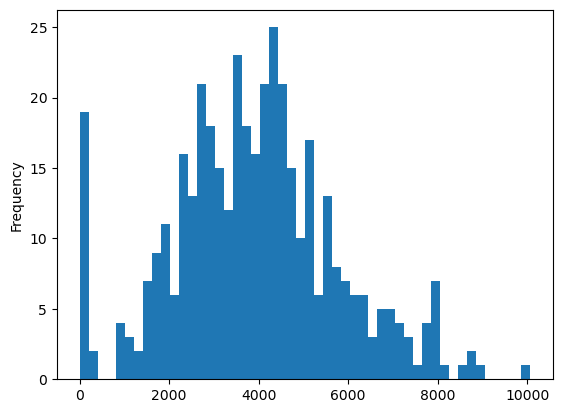

In [61]:
race2['Total Population'].plot.hist(bins=50)

Histogram on Non Hispanic White Alone across Philadelphia County

<AxesSubplot: ylabel='Frequency'>

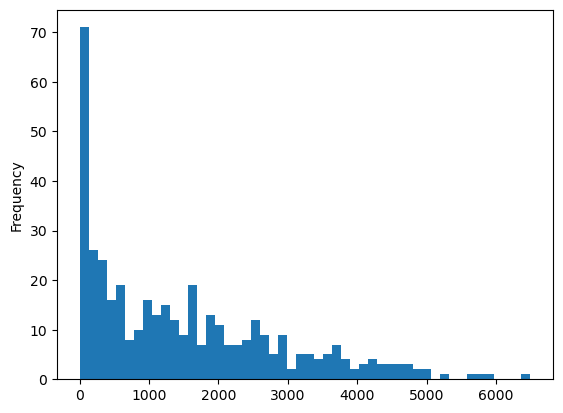

In [62]:
race2['White'].plot.hist(bins=50)

Histogram on Non Hispanic Black Alone Population in Philadelphia County

<AxesSubplot: ylabel='Frequency'>

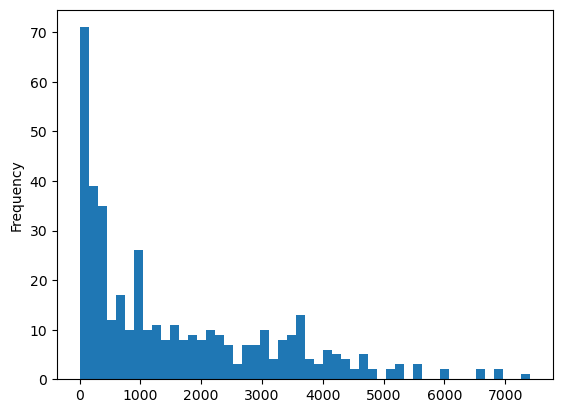

In [63]:
race2['Black'].plot.hist(bins=50)

Box plot of Philadelphia County Population

<AxesSubplot: >

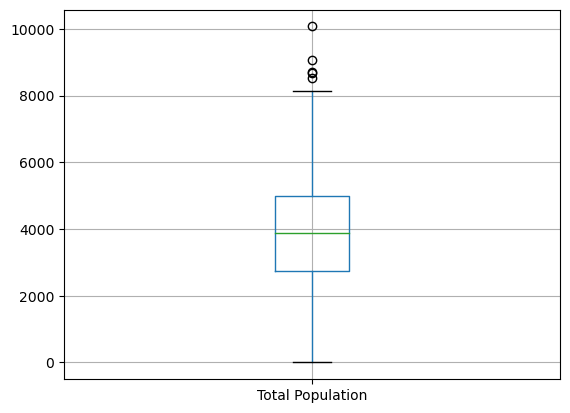

In [64]:
race2.boxplot(column=['Total Population'])

Scatter Plot of Non Hispanic Black Alone and Non Hispanic White Alone populations in Philadelphia County

<AxesSubplot: xlabel='Black', ylabel='White'>

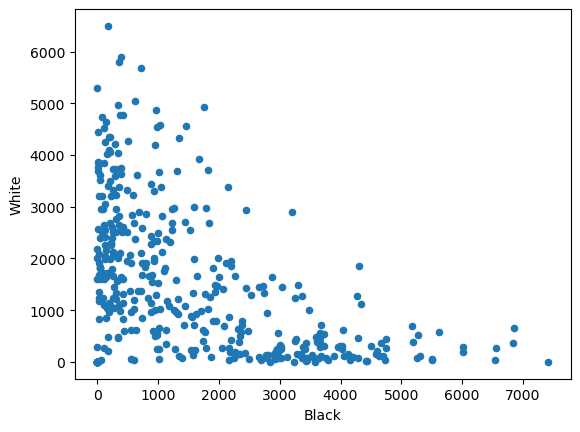

In [65]:
race2.plot.scatter(x='Black',y='White')

Scatter Plot of Non Hispanic Black Alone and Non Hispanic American Indian and Alaska Native Alone populations in Philadelphia County

<AxesSubplot: xlabel='Black', ylabel='American Indian and Alaska Native'>

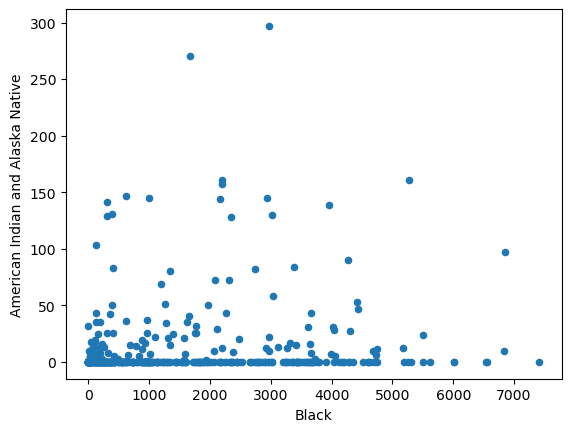

In [66]:
race2.plot.scatter(x='Black',y='American Indian and Alaska Native')

#### Sorting

Sort the data by their respective columns

In [67]:
race_sorted = race2.sort_values(by='Total Population',ascending = False)

Display a few columns of the sorted data

In [68]:
race_sorted[['FIPS','Total Population']].head(10)

FIPS  Total Population
316  42101033000             10074
281  42101029000              9054
290  42101030200              8697
194  42101019200              8667
310  42101032000              8523
297  42101031000              8135
288  42101030000              8024
193  42101019100              8014
314  42101032600              7991
302  42101031401              7969

Plot it

<AxesSubplot: xlabel='FIPS'>

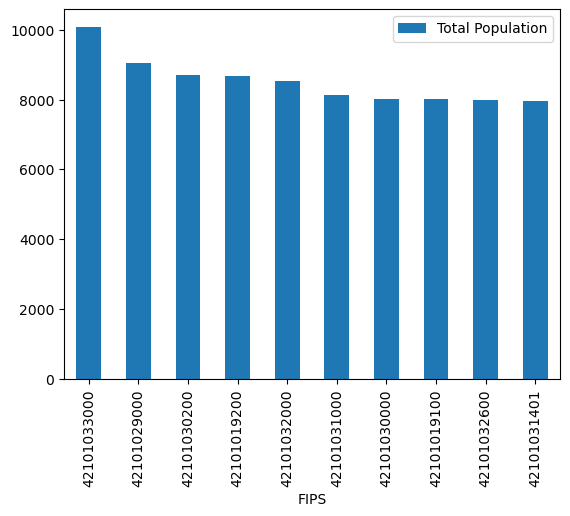

In [69]:
race_sorted.head(10).plot.bar(x='FIPS',
                            y='Total Population')

Add a Title

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population in Philadelphia County in 2021'}, ylabel='FIPS'>

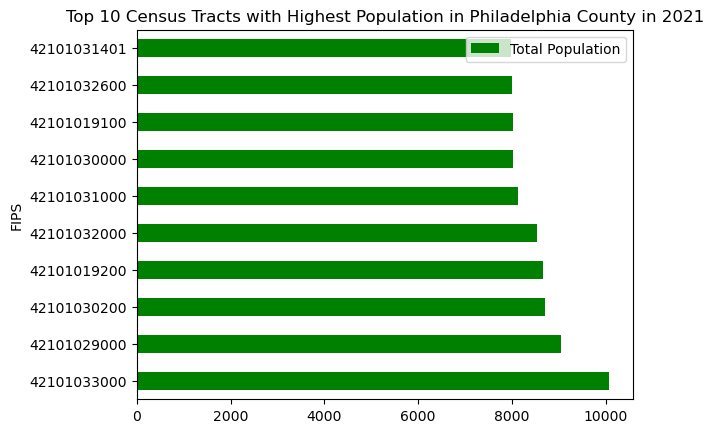

In [70]:
race_sorted.head(10).plot.barh(x='FIPS',
                            y='Total Population', 
                            title='Top 10 Census Tracts with Highest Population in Philadelphia County in 2021',
                            color='green')

#### Filtering and Subsetting the Data

Subset the data so that we can see the data per row

In [71]:
race2[race2['Total Population']==0]

Census Tract         FIPS  Total Population  White  Black  \
365         36901  42101036901                 0      0      0   
387        980001  42101980001                 0      0      0   
389        980003  42101980003                 0      0      0   
392        980300  42101980300                 0      0      0   
393        980400  42101980400                 0      0      0   
394        980500  42101980500                 0      0      0   
395        980600  42101980600                 0      0      0   
396        980701  42101980701                 0      0      0   
397        980702  42101980702                 0      0      0   
398        980800  42101980800                 0      0      0   
399        980901  42101980901                 0      0      0   
400        980902  42101980902                 0      0      0   
401        980903  42101980903                 0      0      0   
402        980904  42101980904                 0      0      0   
403        980905  42101980905                 0      0      0   
404        980906  42101980906                 0      0      0   
406        989200  42101989200                 0      0      0   

     American Indian and Alaska Native  Asian  \
365                                  0      0   
387                                  0      0   
389                                  0      0   
392                                  0      0   
393                                  0      0   
394                                  0      0   
395                                  0      0   
396                                  0      0   
397                                  0      0   
398                                  0      0   
399                                  0      0   
400                                  0      0   
401                                  0      0   
402                                  0      0   
403                                  0      0   
404                                  0      0   
406                                  0      0   

     Native Hawaiian and Other Pacific Islander  Other Race  Multi Race  \
365                                           0           0           0   
387                                           0           0           0   
389                                           0           0           0   
392                                           0           0           0   
393                                           0           0           0   
394                                           0           0           0   
395                                           0           0           0   
396                                           0           0           0   
397                                           0           0           0   
398                                           0           0           0   
399                                           0           0           0   
400                                           0           0           0   
401                                           0           0           0   
402                                           0           0           0   
403                                           0           0           0   
404                                           0           0           0   
406                                           0           0           0   

     Percent White  Percent Black  Percent American Indian and Alaska Native  \
365            NaN            NaN                                        NaN   
387            NaN            NaN                                        NaN   
389            NaN            NaN                                        NaN   
392            NaN            NaN                                        NaN   
393            NaN            NaN                                        NaN   
394            NaN            NaN                                        NaN   
395            NaN    

Create a new variable for census tracts with zero population in Philadelphia County

In [72]:
race_no_pop = race2[race2['Total Population']==0]

How many records?

In [73]:
print('There are ' + str(len(race_no_pop)) + ' census tracts with no people in them')

There are 17 census tracts with no people in them


Display it

In [74]:
race_no_pop[['FIPS','Total Population']]

FIPS  Total Population
365  42101036901                 0
387  42101980001                 0
389  42101980003                 0
392  42101980300                 0
393  42101980400                 0
394  42101980500                 0
395  42101980600                 0
396  42101980701                 0
397  42101980702                 0
398  42101980800                 0
399  42101980901                 0
400  42101980902                 0
401  42101980903                 0
402  42101980904                 0
403  42101980905                 0
404  42101980906                 0
406  42101989200                 0

#### Create a subset of data for the logan Neighborhood

In [75]:
# Specify the desired FIPS by their IDs
subset = [42101028000, 42101028100, 42101028200, 42101028300, 42101028400, 42101028500]

# Create a subset of the data for the desired FIPS
subset = race[race2["FIPS"].isin(subset)]

# Save the subset to a new CSV file
subset.to_csv("census_subset.csv", index=False)

In [76]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 270 to 275
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           6 non-null      int64  
 1   Geo_QName          6 non-null      object 
 2   Geo_FILEID         6 non-null      object 
 3   Geo_STUSAB         6 non-null      object 
 4   Geo_SUMLEV         6 non-null      int64  
 5   Geo_GEOCOMP        6 non-null      int64  
 6   Geo_LOGRECNO       6 non-null      int64  
 7   Geo_STATE          6 non-null      int64  
 8   Geo_COUNTY         6 non-null      int64  
 9   Geo_TRACT          6 non-null      int64  
 10  Geo_GEOID          6 non-null      object 
 11  Geo_NAME           6 non-null      object 
 12  SE_A03001_001      6 non-null      int64  
 13  SE_A03001_002      6 non-null      int64  
 14  SE_A03001_003      6 non-null      int64  
 15  SE_A03001_004      6 non-null      int64  
 16  SE_A03001_005      6 non-n

This subset of data contains columns we don't need

In [77]:
columns_to_keep = ['Geo_TRACT',
                   'Geo_FIPS',
                   'SE_A03001_001',
                   'SE_A03001_002',
                   'SE_A03001_003',
                   'SE_A03001_004',
                   'SE_A03001_005',
                   'SE_A03001_006',
                   'SE_A03001_007',
                   'SE_A03001_008',
                   'PCT_SE_A03001_002',
                   'PCT_SE_A03001_003',
                   'PCT_SE_A03001_004',
                   'PCT_SE_A03001_005',
                   'PCT_SE_A03001_006', 
                   'PCT_SE_A03001_007',
                   'PCT_SE_A03001_008']

subset2 = subset[columns_to_keep]

Rename the kept columns. Begin by creating a list of columns as they are now

In [78]:
columns = list(subset2) # this is the same as race.columns.to_list()
columns

['Geo_TRACT',
 'Geo_FIPS',
 'SE_A03001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008',
 'PCT_SE_A03001_002',
 'PCT_SE_A03001_003',
 'PCT_SE_A03001_004',
 'PCT_SE_A03001_005',
 'PCT_SE_A03001_006', 
 'PCT_SE_A03001_007',
 'PCT_SE_A03001_008']

['Geo_TRACT',
 'Geo_FIPS',
 'SE_A03001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008',
 'PCT_SE_A03001_002',
 'PCT_SE_A03001_003',
 'PCT_SE_A03001_004',
 'PCT_SE_A03001_005',
 'PCT_SE_A03001_006',
 'PCT_SE_A03001_007',
 'PCT_SE_A03001_008']

Replace the values with desired column names

In [79]:
new_columns = ['Census Tract'
               'FIPS',
               'Total Population',
               'White',
               'Black',
               'American Indian and Alaska Native',
               'Asian',
               'Native Hawaiian and Other Pacific Islander',
               'Other Race',
               'Multi Race',
               'Percent White',
               'Percent Black',
               'Percent American Indian and Alaska Native',
               'Percent Asian',
               'Percent Native Hawaiian and Other Pacific Islander',
               'Percent Other Race',
               'Percent Multi Race']

In [80]:
subset2.columns = ['Census Tract',
                   'FIPS',
               'Total Population',
               'White',
               'Black',
               'American Indian and Alaska Native',
               'Asian',
               'Native Hawaiian and Other Pacific Islander',
               'Other Race',
               'Multi Race',
               'Percent White',
               'Percent Black',
               'Percent American Indian and Alaska Native',
               'Percent Asian',
               'Percent Native Hawaiian and Other Pacific Islander',
               'Percent Other Race',
               'Percent Multi Race']

Check sample to see if rename worked

In [81]:
subset2.sample(5)

Census Tract         FIPS  Total Population  White  Black  \
275         28500  42101028500              2735    251    979   
272         28200  42101028200              4840     95   4209   
273         28300  42101028300              6669    588   5618   
274         28400  42101028400              3751    322   2997   
271         28100  42101028100              4317    388   3619   

     American Indian and Alaska Native  Asian  \
275                                  0    419   
272                                  0    352   
273                                  0    222   
274                                  0    334   
271                                  0      0   

     Native Hawaiian and Other Pacific Islander  Other Race  Multi Race  \
275                                           6         850         230   
272                                           0          41         143   
273                                           0           0         241   
274                                           0          15          83   
271                                           0         208         102   

     Percent White  Percent Black  Percent American Indian and Alaska Native  \
275           9.18          35.80                                        0.0   
272           1.96          86.96                                        0.0   
273           8.82          84.24                                        0.0   
274           8.58          79.90                                        0.0   
271           8.99          83.83                                        0.0   

     Percent Asian  Percent Native Hawaiian and Other Pacific Islander  \
275          15.32                                               0.22    
272           7.27                                               0.00    
273           3.33                                               0.00    
274           8.90                                               0.00    
271           0.00                                               0.00    

     Percent Other Race  Percent Multi Race  
275               31.08                8.41  
272                0.85                2.95  
273                0.00                3.61  
274                0.40                2.21  
271                4.82                2.36

success! 

### Narrowing Race Variables to compare with 1940 racial demographics

Due to the 1940 race data only having "White", "Black", and "other Race", we will combine those columns for the 2021 data, to show a comparison. 

In [82]:
subset2.columns

Index(['Census Tract', 'FIPS', 'Total Population', 'White', 'Black',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Other Race',
       'Multi Race', 'Percent White', 'Percent Black',
       'Percent American Indian and Alaska Native', 'Percent Asian',
       'Percent Native Hawaiian and Other Pacific Islander',
       'Percent Other Race', 'Percent Multi Race'],
      dtype='object')

In [85]:
subset2["Other"] = subset2[["American Indian and Alaska Native", "Asian", "Native Hawaiian and Other Pacific Islander", "Other Race", "Multi Race"]].sum(axis=1)
subset2.drop(columns=["FIPS", "American Indian and Alaska Native", "Asian", "Native Hawaiian and Other Pacific Islander", "Other Race", "Multi Race", 'Percent White', 'Percent Black', 'Percent American Indian and Alaska Native','Percent Asian', 'Percent Native Hawaiian and Other Pacific Islander', 'Percent Other Race', 'Percent Multi Race'], inplace=True)

KeyError: "None of [Index(['American Indian and Alaska Native', 'Asian',\n       'Native Hawaiian and Other Pacific Islander', 'Other Race',\n       'Multi Race'],\n      dtype='object')] are in the [columns]"

Now let's create stacked bar chart!

In [86]:
# Convert the "FIPS" column in the CSV subset to string data type (object)
#subset2['FIPS'] = subset2['FIPS'].astype(str)

# set the FIPS column as the index
subset2.set_index('Census Tract', inplace=True)

# remove the 'total population' column
subset2.drop('Total Population', axis=1, inplace=True)

# define a list of custom colors
colors = ['#ABD9B5', '#2C8EBF', '#008080']

# plot the stacked bar chart with custom colors
ax = subset2.plot(kind='bar', stacked=True, color=colors)

# set the axis labels and title
ax.set_xlabel('Census Tract')
ax.set_ylabel('Population')
ax.set_title('Logan Demographic Distribution by Race Category, 2021')

# show the chart
plt.show()

KeyError: "['Total Population'] not found in axis"

I want to show the racial percentange vs individual count on the map, so i'm going to create another subset of data now.

In [44]:
percent_columns = ['Geo_FIPS',                   'PCT_SE_A03001_002',                   'PCT_SE_A03001_003',                   'PCT_SE_A03001_004',                   'PCT_SE_A03001_005',                   'PCT_SE_A03001_006',                    'PCT_SE_A03001_007',                   'PCT_SE_A03001_008']

subset3 = subset[percent_columns]


In [45]:
#Rename the kept columns. Begin by creating a list of columns as they are now

columns = list(subset3) # this is the same as race.columns.to_list()
columns

['Geo_FIPS',
 'PCT_SE_A03001_002',
 'PCT_SE_A03001_003',
 'PCT_SE_A03001_004',
 'PCT_SE_A03001_005',
 'PCT_SE_A03001_006', 
 'PCT_SE_A03001_007',
 'PCT_SE_A03001_008']

['Geo_FIPS',
 'PCT_SE_A03001_002',
 'PCT_SE_A03001_003',
 'PCT_SE_A03001_004',
 'PCT_SE_A03001_005',
 'PCT_SE_A03001_006',
 'PCT_SE_A03001_007',
 'PCT_SE_A03001_008']

In [46]:
#Replace the values with desired column names

new_columns = ['Geo_FIPS',
               'Percent White',
               'Percent Black',
               'Percent American Indian and Alaska Native',
               'Percent Asian',
               'Percent Native Hawaiian and Pacific Islander',
               'Percent Other Race',
               'Percent Multi Race']

subset3.columns = ['FIPS',
'Percent White',
'Percent Black',
'Percent American Indian and Alaska Native',
'Percent Asian',
'Percent Native Hawaiian and Other Pacific Islander',
'Percent Other Race',
'Percent Multi Race']

In [47]:
subset3.sample(5)

FIPS  Percent White  Percent Black  \
272  42101028200           1.96          86.96   
274  42101028400           8.58          79.90   
273  42101028300           8.82          84.24   
275  42101028500           9.18          35.80   
270  42101028000           1.02          96.62   

     Percent American Indian and Alaska Native  Percent Asian  \
272                                        0.0           7.27   
274                                        0.0           8.90   
273                                        0.0           3.33   
275                                        0.0          15.32   
270                                        0.0           0.00   

     Percent Native Hawaiian and Other Pacific Islander  Percent Other Race  \
272                                               0.00                 0.85   
274                                               0.00                 0.40   
273                                               0.00                 0.00   
275                                               0.22                31.08   
270                                               0.00                 0.02   

     Percent Multi Race  
272                2.95  
274                2.21  
273                3.61  
275                8.41  
270                2.33

#### Importing Census Tract Geojson File

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt

Read in a geojson file downloaded from Open Data Philly 


In [49]:
tracts=gpd.read_file('Census_Tracts_2010.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


OBJECTID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10  \
0         1        42        101    009400  42101009400     94   
1         2        42        101    009500  42101009500     95   
2         3        42        101    009600  42101009600     96   
3         4        42        101    013800  42101013800    138   
4         5        42        101    013900  42101013900    139   

         NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0   Census Tract 94   G5020          S   366717         0  +39.9632709   
1   Census Tract 95   G5020          S   319070         0  +39.9658709   
2   Census Tract 96   G5020          S   405273         0  +39.9655396   
3  Census Tract 138   G5020          S   341256         0  +39.9764504   
4  Census Tract 139   G5020          S   562934         0  +39.9750563   

     INTPTLON10 LOGRECNO                                           geometry  
0  -075.2322437    10429  POLYGON ((-75.22927 39.96054, -75.22865 39.960...  
1  -075.2379140    10430  POLYGON ((-75.23536 39.96852, -75.23545 39.969...  
2  -075.2435075    10431  POLYGON ((-75.24343 39.96230, -75.24339 39.962...  
3  -075.1771771    10468  POLYGON ((-75.17341 39.97779, -75.17386 39.977...  
4  -075.1711846    10469  POLYGON ((-75.17313 39.97776, -75.17321 39.977...

plot the file

<AxesSubplot: >

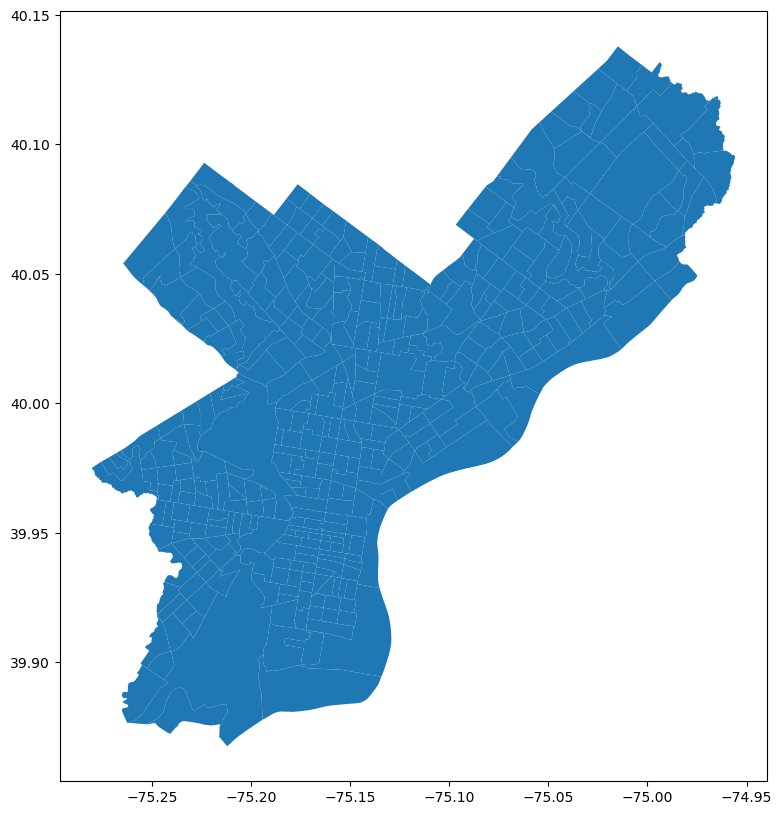

In [50]:
tracts.plot(figsize=(12,10))

Learn more about this dataset

In [51]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    384 non-null    int64   
 1   STATEFP10   384 non-null    object  
 2   COUNTYFP10  384 non-null    object  
 3   TRACTCE10   384 non-null    object  
 4   GEOID10     384 non-null    object  
 5   NAME10      384 non-null    object  
 6   NAMELSAD10  384 non-null    object  
 7   MTFCC10     384 non-null    object  
 8   FUNCSTAT10  384 non-null    object  
 9   ALAND10     384 non-null    int64   
 10  AWATER10    384 non-null    int64   
 11  INTPTLAT10  384 non-null    object  
 12  INTPTLON10  384 non-null    object  
 13  LOGRECNO    384 non-null    object  
 14  geometry    384 non-null    geometry
dtypes: geometry(1), int64(3), object(11)
memory usage: 45.1+ KB


Only FIPS and geometry are needed, so subset the data

In [52]:
tracts2 = tracts[['TRACTCE10','geometry']]
tracts2.head()

TRACTCE10                                           geometry
0    009400  POLYGON ((-75.22927 39.96054, -75.22865 39.960...
1    009500  POLYGON ((-75.23536 39.96852, -75.23545 39.969...
2    009600  POLYGON ((-75.24343 39.96230, -75.24339 39.962...
3    013800  POLYGON ((-75.17341 39.97779, -75.17386 39.977...
4    013900  POLYGON ((-75.17313 39.97776, -75.17321 39.977...

Create a FIPS column

In [53]:
tracts2['FIPS'] ='42'+'101'+tracts['TRACTCE10']

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [54]:
tracts2.head()

TRACTCE10                                           geometry         FIPS
0    009400  POLYGON ((-75.22927 39.96054, -75.22865 39.960...  42101009400
1    009500  POLYGON ((-75.23536 39.96852, -75.23545 39.969...  42101009500
2    009600  POLYGON ((-75.24343 39.96230, -75.24339 39.962...  42101009600
3    013800  POLYGON ((-75.17341 39.97779, -75.17386 39.977...  42101013800
4    013900  POLYGON ((-75.17313 39.97776, -75.17321 39.977...  42101013900

##### Merging/Joining Data

Create a new dataframe based on the join

In [55]:
tracts2.dtypes

TRACTCE10      object
geometry     geometry
FIPS           object
dtype: object

In [56]:
race2.dtypes

FIPS                                                    int64
Total Population                                        int64
White                                                   int64
Black                                                   int64
American Indian and Alaska Native                       int64
Asian                                                   int64
Native Hawaiian and Pacific Islander                    int64
Other Race                                              int64
Multi Race                                              int64
Percent White                                         float64
Percent Black                                         float64
Percent American Indian and Alaska Native             float64
Percent Asian                                         float64
Percent Native Hawaiian and Other Pacific Islander    float64
Percent Other Race                                    float64
Percent Multi Race                                    float64
dtype: o

In [57]:
# Convert the "FIPS" column in the CSV to string data type (object)
race2['FIPS'] = race2['FIPS'].astype(str)

/tmp/ipykernel_1418/198664728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race2['FIPS'] = race2['FIPS'].astype(str)


In [58]:
race2["Percent Other"] = race2[["Percent American Indian and Alaska Native", "Percent Asian", "Percent Native Hawaiian and Other Pacific Islander", "Percent Other Race", "Percent Multi Race"]].sum(axis=1)
race2.drop(columns=['Percent American Indian and Alaska Native','Percent Asian', 'Percent Native Hawaiian and Other Pacific Islander', 'Percent Other Race', 'Percent Multi Race'], inplace=True)

/tmp/ipykernel_1418/3330771354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race2["Percent Other"] = race2[["Percent American Indian and Alaska Native", "Percent Asian", "Percent Native Hawaiian and Other Pacific Islander", "Percent Other Race", "Percent Multi Race"]].sum(axis=1)
/tmp/ipykernel_1418/3330771354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race2.drop(columns=['Percent American Indian and Alaska Native','Percent Asian', 'Percent Native Hawaiian and Other Pacific Islander', 'Percent Other Race', 'Percent Multi Race'], inplace=True)


In [59]:
tracts2_race2=tracts2.merge(race2,on="FIPS")

In [60]:
tracts2_race2.head()

TRACTCE10                                           geometry         FIPS  \
0    009400  POLYGON ((-75.22927 39.96054, -75.22865 39.960...  42101009400   
1    009500  POLYGON ((-75.23536 39.96852, -75.23545 39.969...  42101009500   
2    009600  POLYGON ((-75.24343 39.96230, -75.24339 39.962...  42101009600   
3    013800  POLYGON ((-75.17341 39.97779, -75.17386 39.977...  42101013800   
4    013900  POLYGON ((-75.17313 39.97776, -75.17321 39.977...  42101013900   

   Total Population  White  Black  American Indian and Alaska Native  Asian  \
0              3895     85   3562                                  0      0   
1              3436     77   3359                                  0      0   
2              3775      0   3579                                  0      2   
3              1806    565    986                                  0     83   
4              2903   1215   1335                                 15     12   

   Native Hawaiian and Pacific Islander  Other Race  Multi Race  \
0                                     0          27         221   
1                                     0           0           0   
2                                    50         136           8   
3                                    33          33         106   
4                                     0         179         147   

   Percent White  Percent Black  Percent Other  
0           2.18          91.45           6.36  
1           2.24          97.76           0.00  
2           0.00          94.81           5.18  
3          31.28          54.60          14.13  
4          41.85          45.99          12.16

Create a merged data set with the Logan Neighborhood subset of data.

In [61]:
subset3.dtypes

FIPS                                                    int64
Percent White                                         float64
Percent Black                                         float64
Percent American Indian and Alaska Native             float64
Percent Asian                                         float64
Percent Native Hawaiian and Other Pacific Islander    float64
Percent Other Race                                    float64
Percent Multi Race                                    float64
dtype: object

In [62]:
# Convert the "FIPS" column in the subset to string data type (object)
subset3['FIPS'] = subset3['FIPS'].astype(str)

/tmp/ipykernel_1418/3640776750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset3['FIPS'] = subset3['FIPS'].astype(str)


In [63]:
tracts2_subset3=tracts2.merge(subset3,on="FIPS")

In [64]:
subset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 270 to 275
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   FIPS                                                6 non-null      object 
 1   Percent White                                       6 non-null      float64
 2   Percent Black                                       6 non-null      float64
 3   Percent American Indian and Alaska Native           6 non-null      float64
 4   Percent Asian                                       6 non-null      float64
 5   Percent Native Hawaiian and Other Pacific Islander  6 non-null      float64
 6   Percent Other Race                                  6 non-null      float64
 7   Percent Multi Race                                  6 non-null      float64
dtypes: float64(7), object(1)
memory usage: 432.0+ bytes


#### Create Choropleth Maps

Map Philadelphia Non Hispanic Black Alone population

<AxesSubplot: >

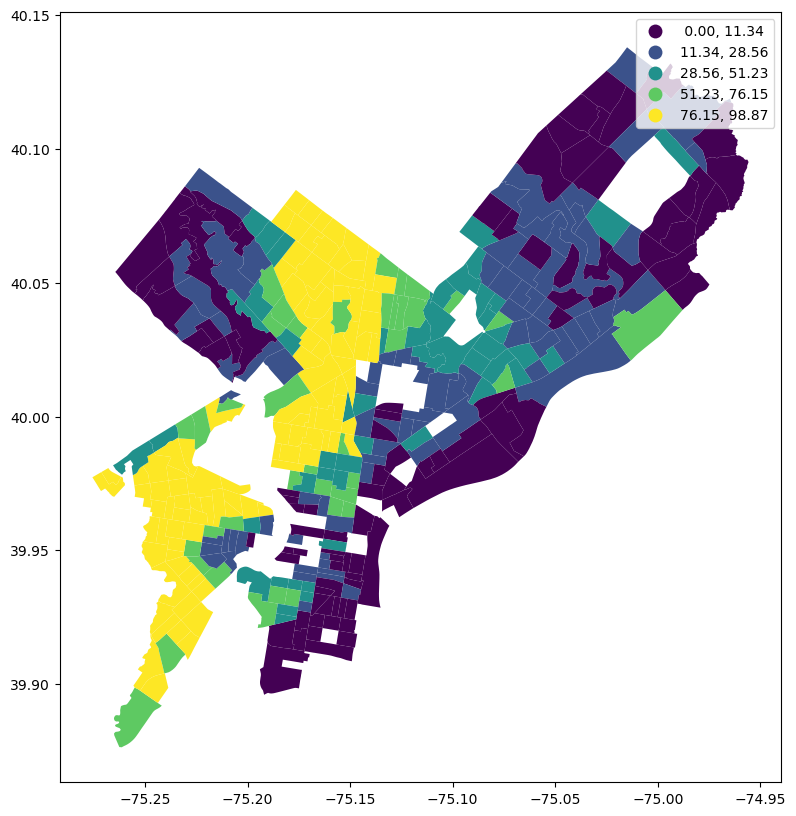

In [65]:
tracts2_race2.plot(figsize=(12,10),
                 column='Percent Black',
                 legend=True, 
                 scheme='NaturalBreaks')

Map Logan  Non Hispanic Black Alone population

<AxesSubplot: >

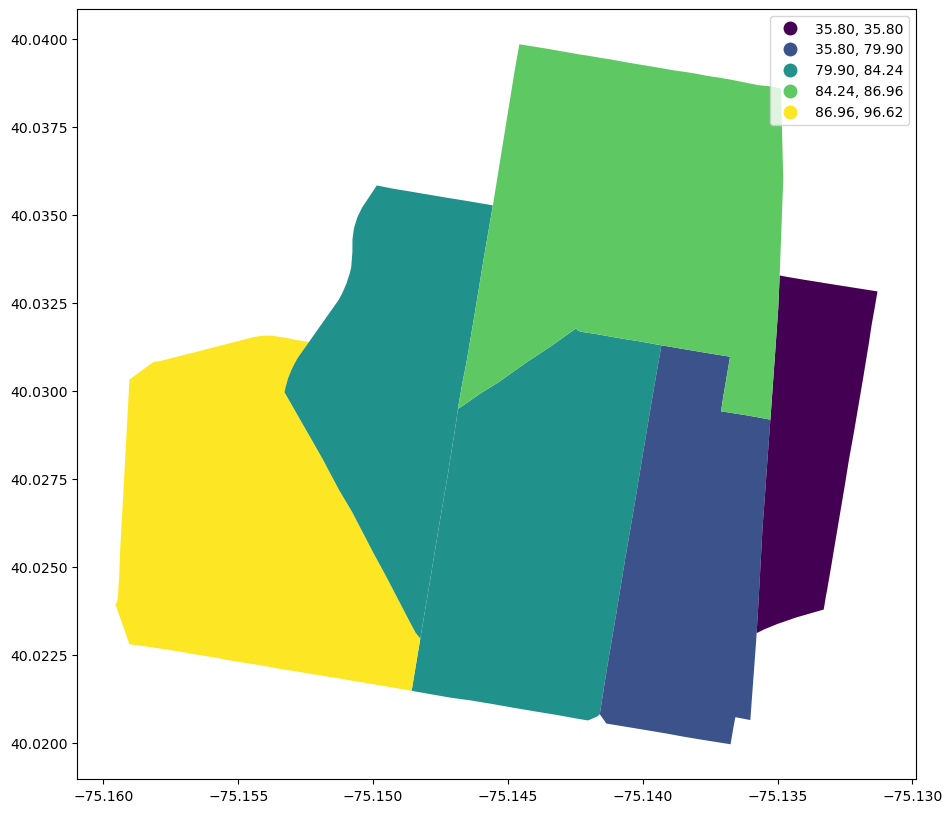

In [66]:
tracts2_subset3.plot(figsize=(12,10),
                 column='Percent Black',
                 legend=True, 
                 scheme='NaturalBreaks')

The map outputs demonstrate that the Logan Neigbhorhood is located within a part of neighborhood that has a higher Non Hispanic Black Along population than other parts of Philadelphia

Try to view same race data through the " Quantiles" Scheme

<AxesSubplot: >

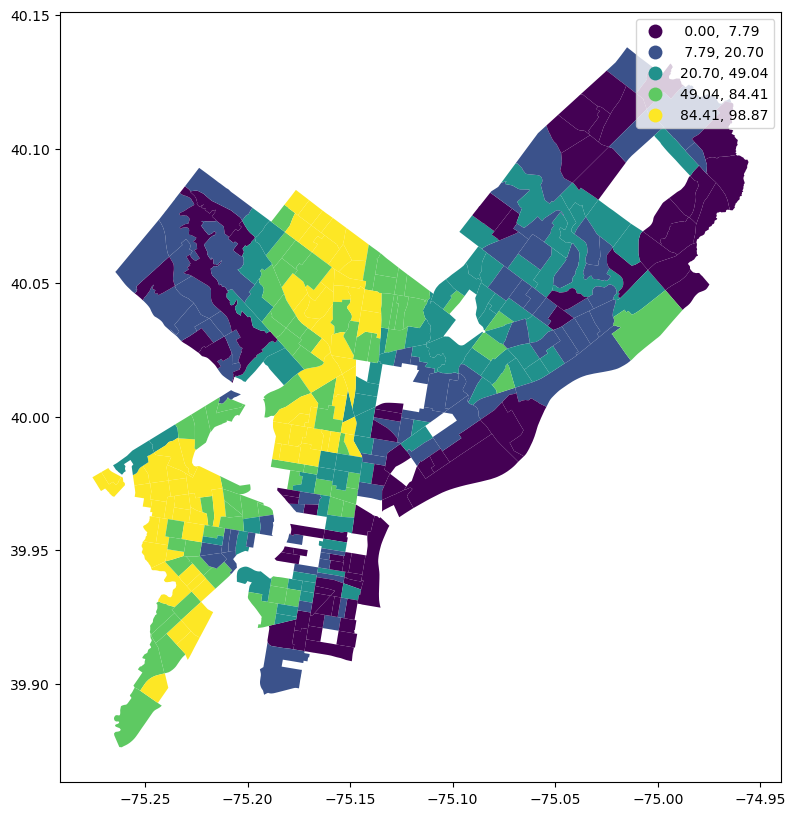

In [67]:
tracts2_race2.plot(figsize=(12,10),
                 column='Percent Black',
                 legend=True, 
                 scheme='quantiles')

<AxesSubplot: >

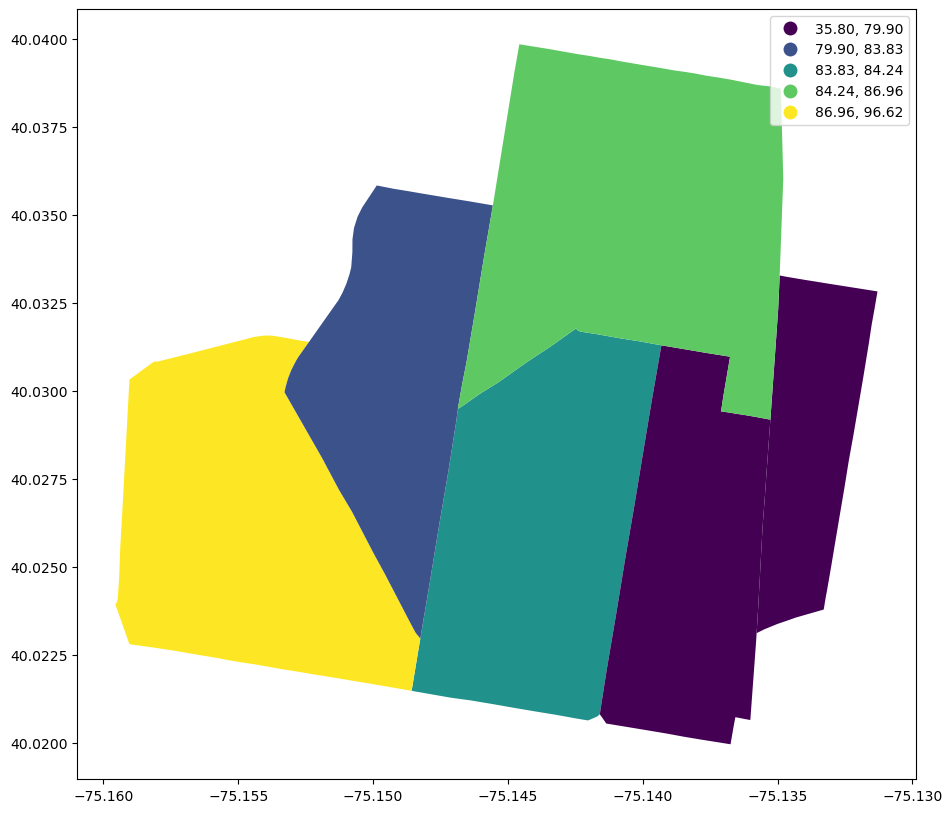

In [68]:
tracts2_subset3.plot(figsize=(12,10),
                 column='Percent Black',
                 legend=True, 
                 scheme='quantiles')

#### Let's try to make a live folium map!

Finally, we can create the map using folium. We can use the Choropleth function from folium to create the map and plot the data on it

In [86]:
#import folium and it's plugin
import folium
from folium.plugins import MarkerCluster

# Define initial map location, zoom level,  and base map (tile).
# philadelphia center = 39.9526° N, 75.1652° W

my_map = folium.Map(location=[+39.99, -75.1652], 
               zoom_start = 11,
               tiles='Stamen Toner', 
               attribution='Stamen Toner')

# Add a choropleth layer to the map
folium.Choropleth(
    geo_data=tracts2_race2, # geo data
    name='Percent White', # data 
    data=tracts2_race2,
    columns=['FIPS', 'Percent White'], # [key, value]
    key_on='feature.properties.FIPS', # key, or merge column
    fill_color='YlGnBu',
    line_weight=0.1, 
    fill_opacity=0.7,
    line_opacity=0.2, # line opacity (of the border)
    legend_name='Percent White in Philadelphia (2021)',
    highlight=True
).add_to(my_map)

# Load the data for the 'Percent Black' column
black_data = tracts2_race2.set_index('FIPS')['Percent Black'].to_dict()

# Add a choropleth layer for 'Percent Black' to the map
folium.Choropleth(
    geo_data=tracts2_race2,
    name='Percent Black',
    data=tracts2_race2,
    columns=['FIPS', 'Percent Black'],
    key_on='feature.properties.FIPS',
    fill_color='BuPu',
    line_weight=0.1, 
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percent Black in Philadelphia (2021)',
    highlight=True
).add_to(my_map)

# Load the data for the 'Percent Other' column
Other_data = tracts2_race2.set_index('FIPS')['Percent Other'].to_dict()

# Add a choropleth layer for 'Percent Other' to the map
folium.Choropleth(
    geo_data=tracts2_race2,
    name='Percent Other',
    data=tracts2_race2,
    columns=['FIPS', 'Percent Other'],
    key_on='feature.properties.FIPS',
    fill_color='RdPu',
    line_weight=0.1, 
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percent Other Race in Philadelphia (2021)',
    highlight=True
).add_to(my_map)

# Add the layer control to the map
folium.LayerControl().add_to(my_map)

# Display the map
my_map

#save as an html 
# my_map.save('PhillyRace2021.html')

Here, I am using the folium.Choropleth class to create a choropleth layer on the map. I pass in the merged data frame (tracts2_race2) as the geo_data parameter, and specify the FIPS and Percent White columns as the data columns for the choropleth using the columns parameter. The key_on parameter is set to feature.properties.FIPS to match the format of the FIPS code in the GeoJSON file. The fill_color parameter is set to 'YlGn' to specify the color scale for the choropleth. Then,  I add the next layers of racial demographic percentages. I also adjusted the fill_color, fill_opacity, and line_opacity parameters to get the desired visualization.